In [14]:
#Importaciones

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Leer los datos y guardarlos en un dataframe
data = pd.read_csv('datos.csv', index_col=0)

In [5]:
#Ver el tamaño de los datos

print(data.shape)
data.head()


(414, 7)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
#Estadisticas descriptivas de las variables

data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


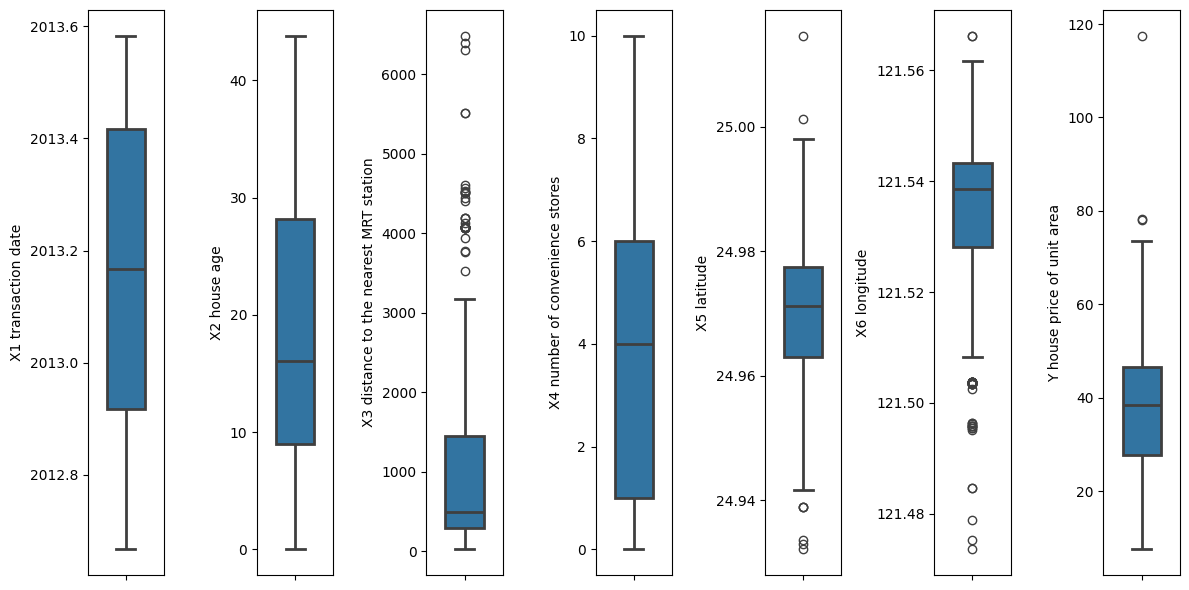

In [17]:
# Crear una visualizacion para las graficas
plt.figure(figsize=(12, 6))

# Sacar el numero de variables
num_variables = data.shape[1]

# Crear un boxplot para cada variable
for i in range(num_variables):
    plt.subplot(1, num_variables, i+1)
    sns.boxplot(y=data.iloc[:, i], width=0.5, linewidth=2)
    plt.ylabel(data.columns[i]) 

# Evitar que las graficas se sobrelapen
plt.tight_layout()

# Mostrar el plot
plt.show()

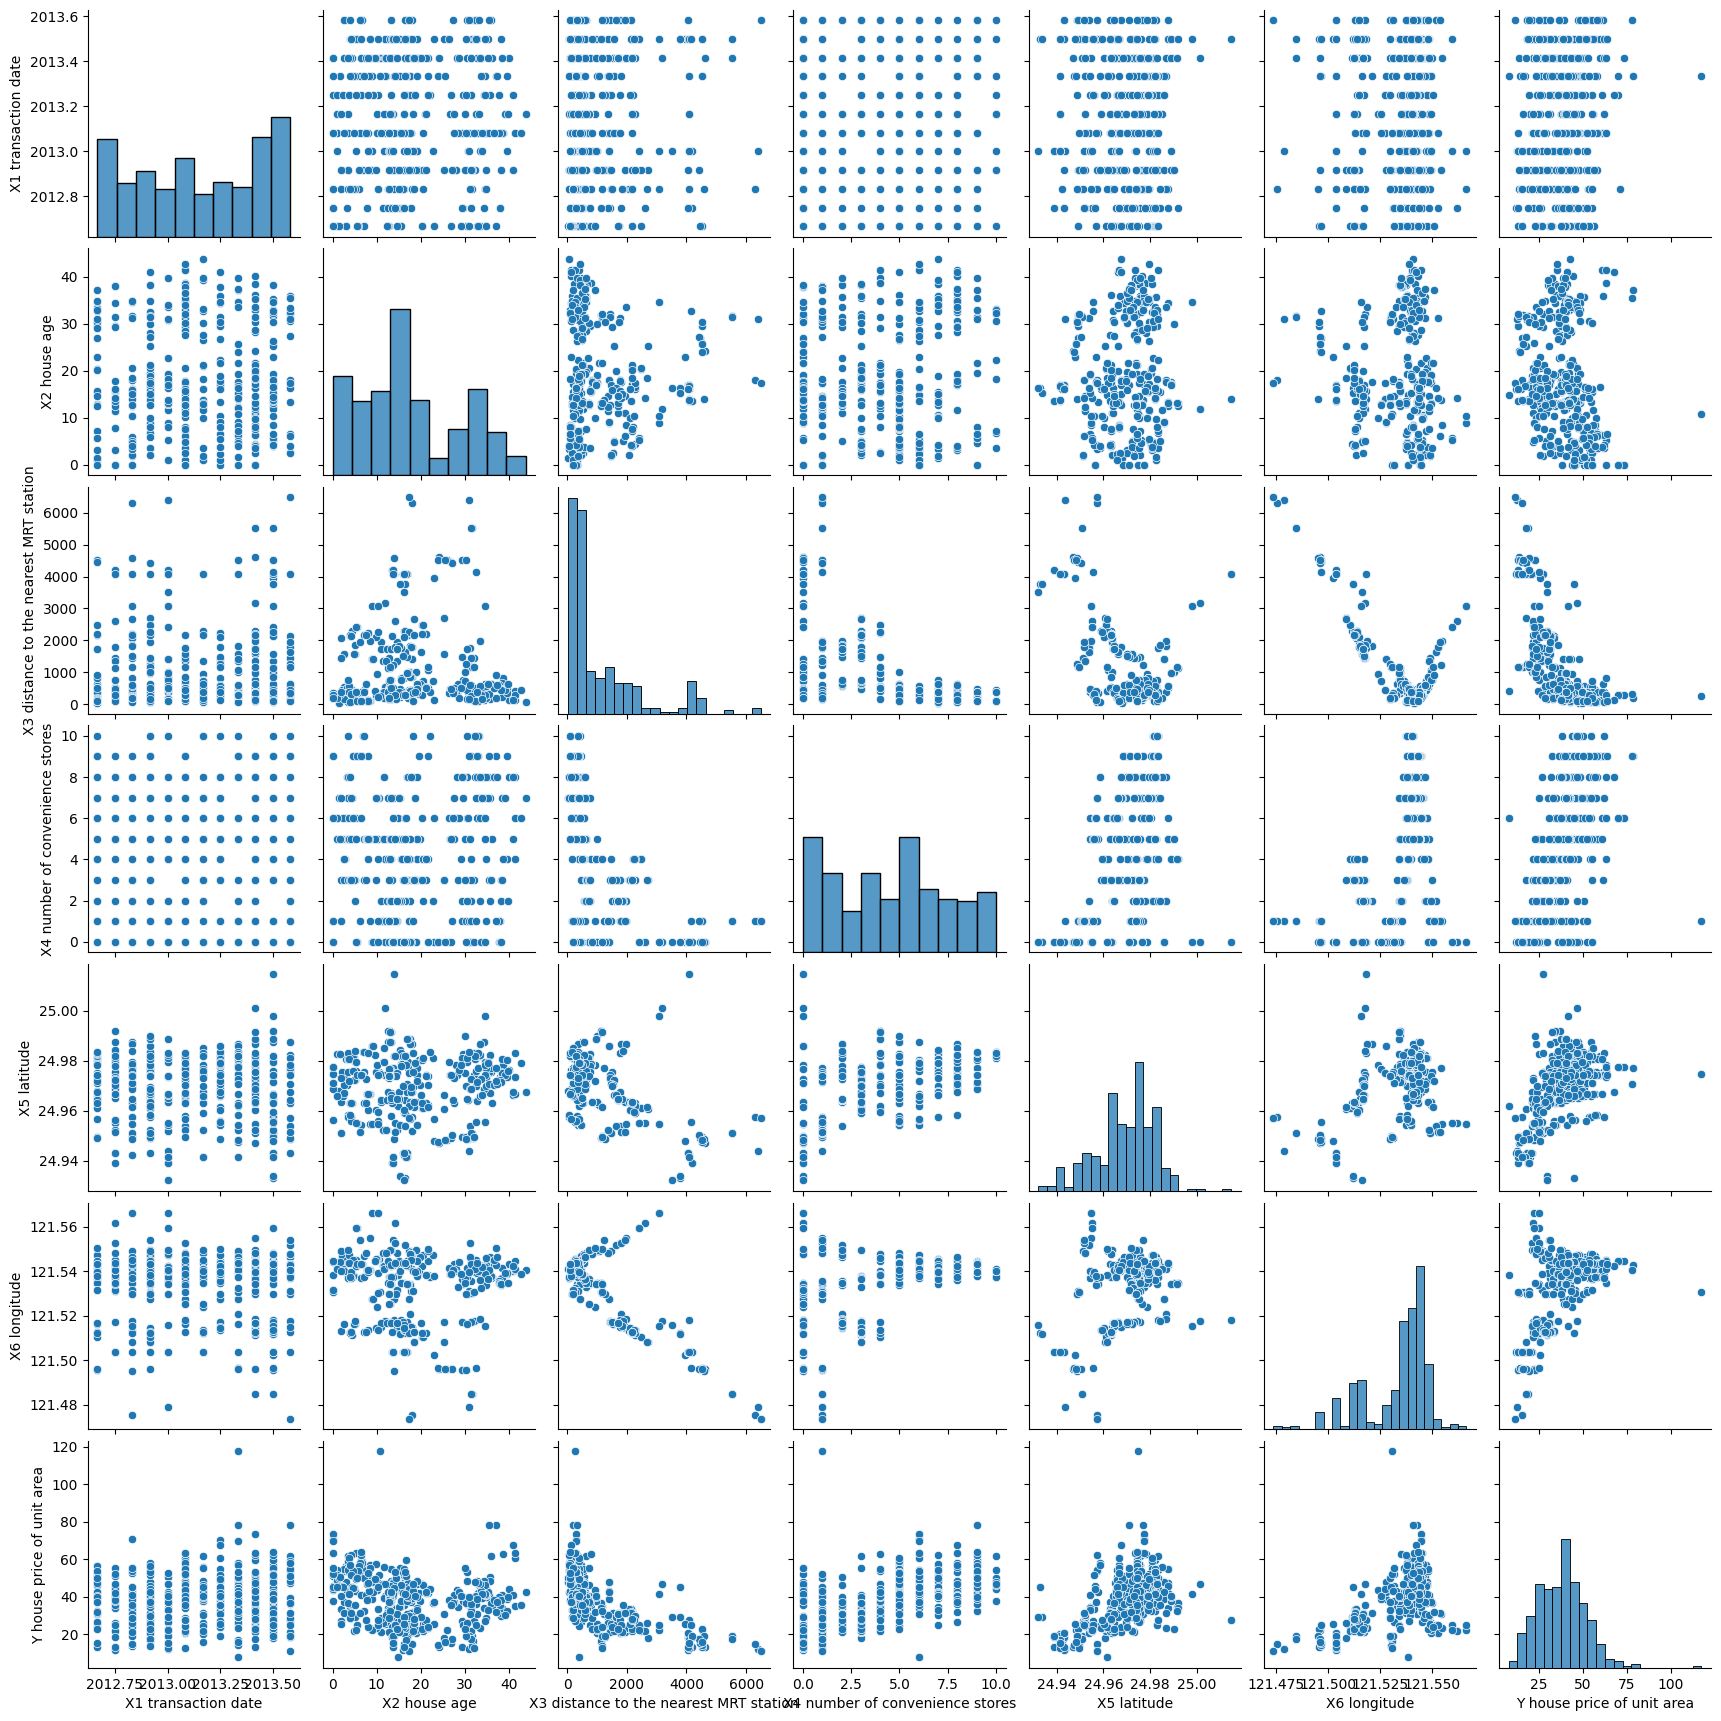

In [18]:
#Visualizacion de la relacion de las variables 

sns.pairplot(data,)

<Axes: >

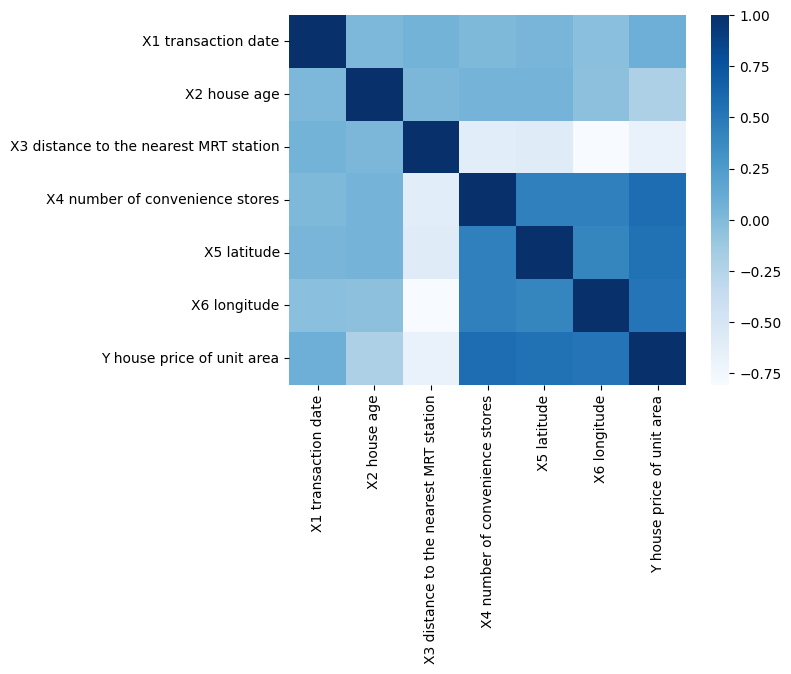

In [23]:
#Correlograma para la relacion entre las variables

corr = data.corr()
sns.heatmap(corr, cmap="Blues")

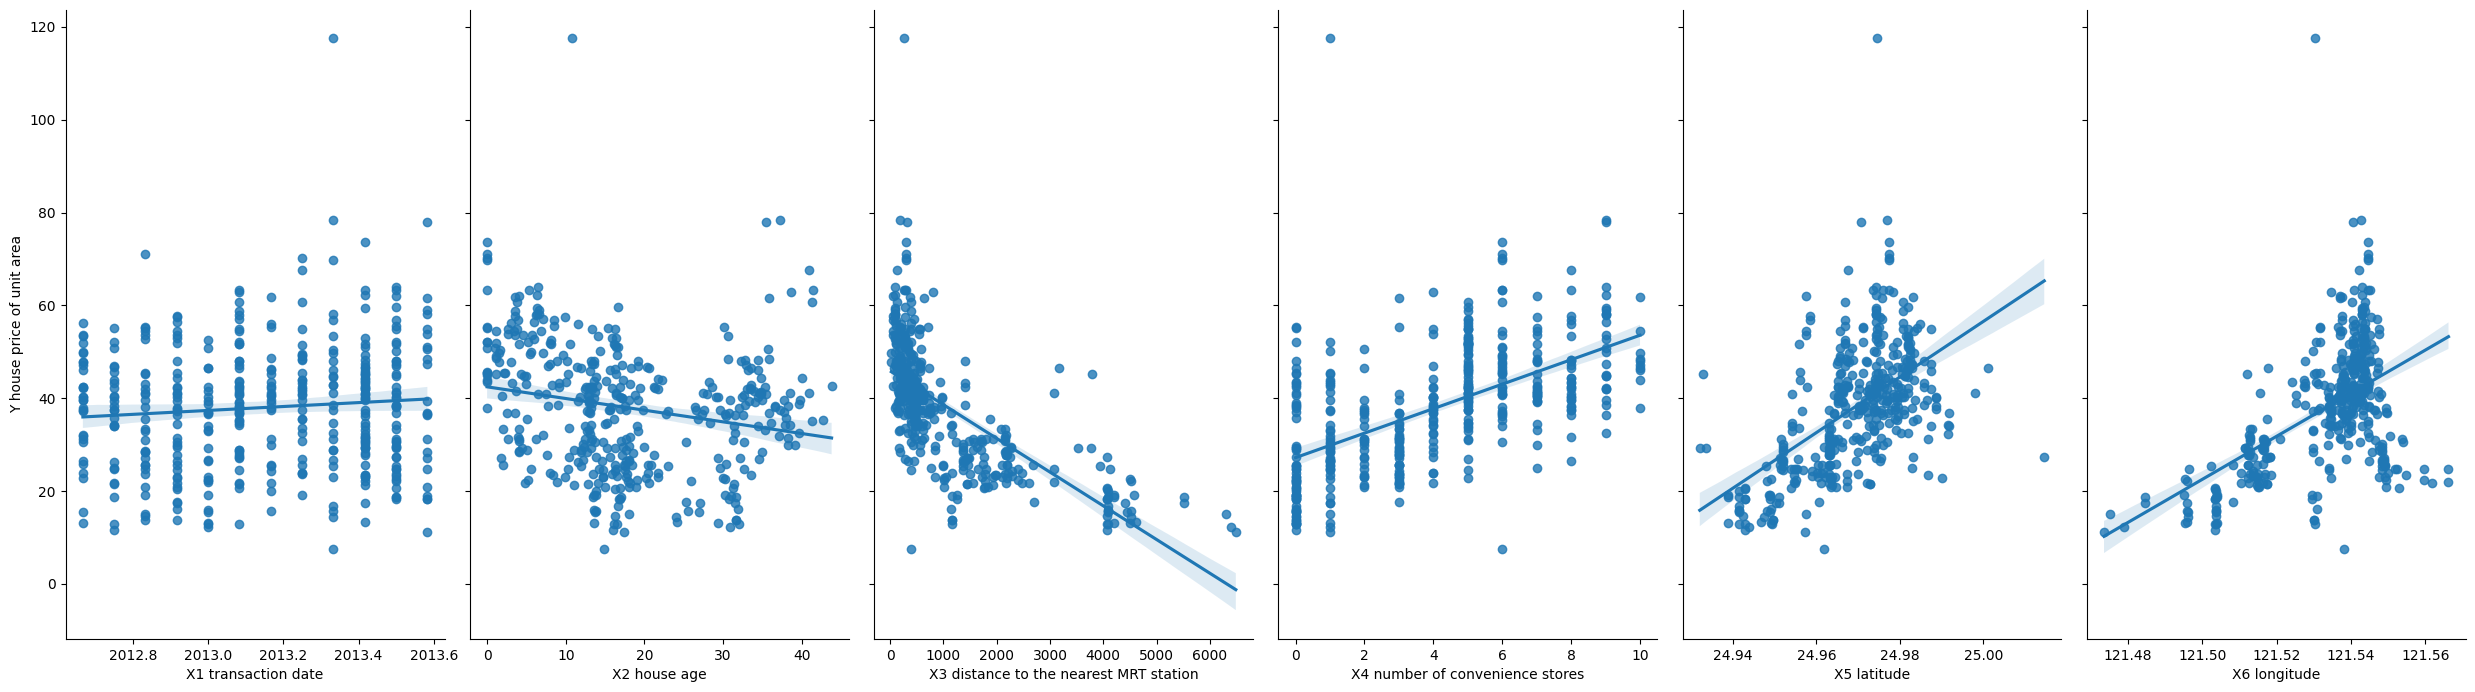

In [33]:
#Diagrama de dispersion con tendencia

sns.pairplot(data, x_vars= data.columns[:-1], y_vars='Y house price of unit area', height=7, aspect=0.6, kind='reg')

### Modelo lineal

In [34]:
# nombres de características
features = data.columns[:-1]

# dataframe de características
X = data[features]

X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [35]:
# variable de respuesta
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [ ]:
#Separacion entre datos de train y test